In [1]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

In [3]:
# read files
data_dir = 'data'

def read(path):
    return gpd.read_file(path)

grid_fp = f'{data_dir}/TravelTimes_to_5975375_RailwayStation.shp'
metro_fp = f'{data_dir}/metro.shp'
roads_fp = f'{data_dir}/roads.shp'

# read shapefile data
grid = read(grid_fp)
metro = read(metro_fp)
roads = read(roads_fp)

In [5]:
# check the CRS of all the data and reproject to the same CRS
print(grid.crs)
print(roads.crs)
print(metro.crs)

epsg:3067
epsg:2392
epsg:2392


In [6]:
# reproject the other data into grid CRS, it is the more common one and is the largest dataset
metro = metro.to_crs(grid.crs)
roads = roads.to_crs(grid.crs)

print(metro.crs)
print(roads.crs)

epsg:3067
epsg:3067


In [7]:
grid.crs == roads.crs == metro.crs

True

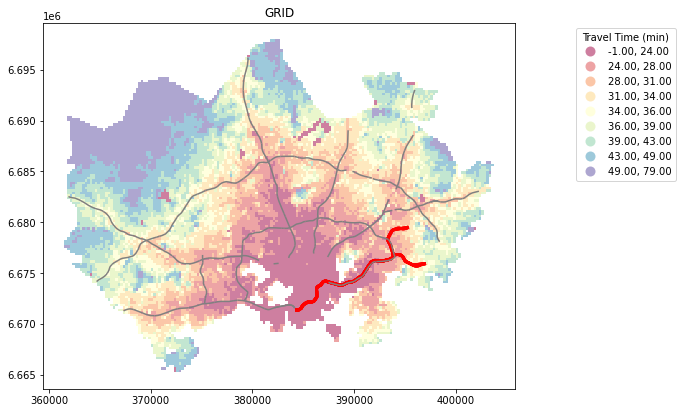

In [32]:
fig, r1= plt.subplots(ncols=1, nrows=1, figsize=(10, 20))

# plot grid r1
grid.plot(ax=r1, column='car_r_t', scheme='quantiles', cmap='Spectral', k=9, alpha=0.5, legend=True)
# you can add a label to the legend when the data is unclassified by passing the optional
# argument "legend_kwds={'label': 'Trave Time in Minutes'}"

# to set the title even when data is already classified when plotting
r1.get_legend().set_title('Travel Time (min)')

# move the legend around (setting the bounding box)
r1.get_legend().set_bbox_to_anchor((1.35, 1))

r1.set_title('GRID')

# plot metro r2
metro.plot(ax=r1, color='red', linewidth=3)

# plot roads r3
roads.plot(ax=r1, color='gray', linewidth=1.5)

plt.tight_layout()
plt.savefig('grid_cells_static.png', dpi=300)
plt.show()